# Estatística descritiva bivariada

## Associação entre duas variáveis qualitativas

### Medidas de associação

#### Coeficiente de Spearman

O coeficiente de Spearman ($r_{sp}$) é uma medida de associação entre duas variáveis qualitativas ordinais.

Inicialmente, devemos ordenar o conjunto de dados da variável *X* e da variável *Y* de forma crescente. A partir dessa ordenação, é possível criar postos ou *rankings*, denotados por *k* (*k = 1, ..., n*). A atribuição desses postos é feita isoladamente para cada variável. O posto 1 é então atribuído ao menor valor da variável, o posto 2 ao segundo menor valor, e assim por diante, até o posto *n* para o maior valor. Em caso de empate entre os valores de ordem *k* e *k+1*, devemos atribuir o posto $k + \frac{1}{2}$ para ambas as observações.

O cálculo do coeficiente de Spearman pode ser elaborado por meio da seguinte expressão:

$$
r_{sp} = 1 - \frac{6 \sum\limits_{k=1}^{n} d_k^2}{n(n^2 - 1)}
$$

em que:

- $d_k$ é a diferença entre os postos das variáveis *X* e *Y*;
- $n$ é o número de observações (pares de valores) da amostra.

O coeficiente de Spearman varia entre -1 e 1. Valores próximos de 1 indicam associação positiva entre as variáveis, enquanto valores próximos de -1 indicam associação negativa. Valores próximos de 0 indicam ausência de associação.

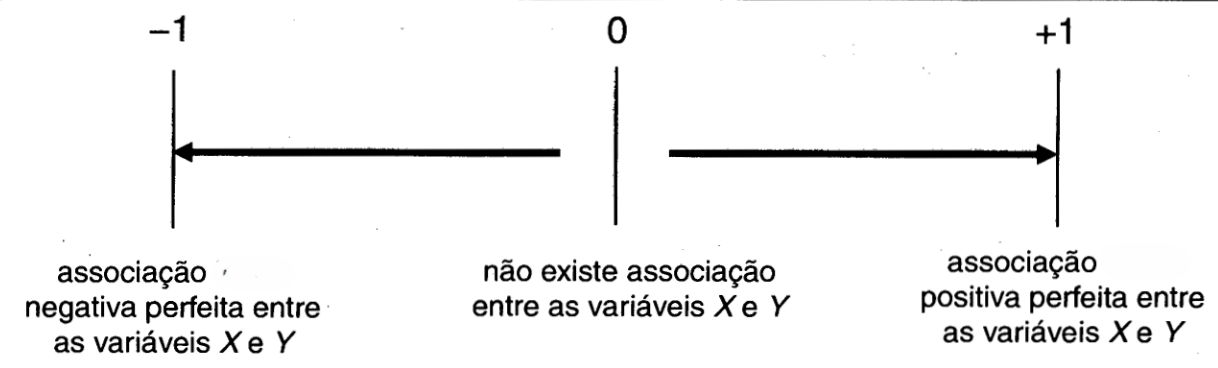

Para ilustrar, considere a base a seguir. A base apresenta as notas finais para alunos do último ano de um colégio para as disciplinas matemática e física. Vamos verificar se as notas possuem algum tipo de associação.

In [1]:
import pandas as pd

DADOS_SPEARMAN = "./dados/grades_math_phys.csv"

df_notas = pd.read_csv(DADOS_SPEARMAN, index_col="student")

df_notas

,math,physics
student,,
1,4.7,6.6
2,6.3,5.1
3,7.5,6.9
4,5.0,7.1
5,4.4,3.5
6,3.7,4.6
7,8.5,6.8
8,8.2,7.5
9,3.5,4.2


In [2]:
df_notas.describe()

,math,physics
count,10.000000,10.000000
mean,5.580000,5.560000
std,1.899006,1.594574
min,3.500000,3.300000
25%,4.100000,4.300000
50%,4.850000,5.850000
75%,7.200000,6.875000
max,8.500000,7.500000


In [4]:
df_notas.corr(method="spearman")

,math,physics
math,1.000000,0.757576
physics,0.757576,1.000000


In [5]:
from scipy.stats import spearmanr

spearmanr(df_notas['math'], df_notas['physics'])

SignificanceResult(statistic=np.float64(0.7575757575757575), pvalue=np.float64(0.011143446799694208))

In [8]:
df_notas.sort_values('math')

,math,physics
student,,
9,3.5,4.2
6,3.7,4.6
10,4.0,3.3
5,4.4,3.5
1,4.7,6.6
4,5.0,7.1
2,6.3,5.1
3,7.5,6.9
8,8.2,7.5


In [9]:
df_notas.sort_values('math').reset_index(drop=True)

,math,physics
0,3.5,4.2
1,3.7,4.6
2,4.0,3.3
3,4.4,3.5
4,4.7,6.6
5,5.0,7.1
6,6.3,5.1
7,7.5,6.9
8,8.2,7.5
9,8.5,6.8


<Axes: >

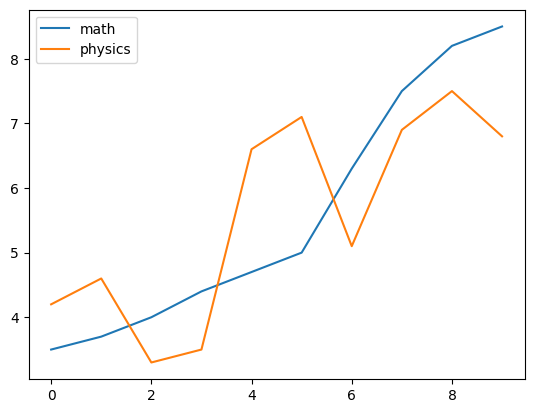

In [10]:
df_notas.sort_values('math').reset_index(drop=True).plot()

In [13]:
df_notas['math_rank']=df_notas['math'].rank()
df_notas['physics_rank']=df_notas['physics'].rank()

df_notas

,math,physics,math_rank,physics_rank
student,,,,
1,4.7,6.6,5.0,6.0
2,6.3,5.1,7.0,5.0
3,7.5,6.9,8.0,8.0
4,5.0,7.1,6.0,9.0
5,4.4,3.5,4.0,2.0
6,3.7,4.6,2.0,4.0
7,8.5,6.8,10.0,7.0
8,8.2,7.5,9.0,10.0
9,3.5,4.2,1.0,3.0


In [14]:
df_notas['rank_dif']= df_notas['math_rank'] - df_notas['physics_rank']

df_notas

,math,physics,math_rank,physics_rank,rank_dif
student,,,,,
1,4.7,6.6,5.0,6.0,-1.0
2,6.3,5.1,7.0,5.0,2.0
3,7.5,6.9,8.0,8.0,0.0
4,5.0,7.1,6.0,9.0,-3.0
5,4.4,3.5,4.0,2.0,2.0
6,3.7,4.6,2.0,4.0,-2.0
7,8.5,6.8,10.0,7.0,3.0
8,8.2,7.5,9.0,10.0,-1.0
9,3.5,4.2,1.0,3.0,-2.0


In [15]:
df_notas['rank_difqa']= df_notas['rank_dif']**2

df_notas

,math,physics,math_rank,physics_rank,rank_dif,rank_difqa
student,,,,,,
1,4.7,6.6,5.0,6.0,-1.0,1.0
2,6.3,5.1,7.0,5.0,2.0,4.0
3,7.5,6.9,8.0,8.0,0.0,0.0
4,5.0,7.1,6.0,9.0,-3.0,9.0
5,4.4,3.5,4.0,2.0,2.0,4.0
6,3.7,4.6,2.0,4.0,-2.0,4.0
7,8.5,6.8,10.0,7.0,3.0,9.0
8,8.2,7.5,9.0,10.0,-1.0,1.0
9,3.5,4.2,1.0,3.0,-2.0,4.0


In [16]:
1 - (6*df_notas['rank_difqa'].sum())/(df_notas.shape[0]*(df_notas.shape[0]**2-1))

np.float64(0.7575757575757576)